In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import time

In [20]:
# !pip install selenium
# !pip install beautifulsoup4

In [21]:
import os
current_path = os.path.abspath('').replace('\\','/')
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(current_path + '/chromedriver.exe',chrome_options=options)

# driver = webdriver.Chrome(chrome_options=options)
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)
#자신의 인스타 계정 메일 입력 
email = '-------------'
input_id = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input')
input_id.clear()
input_id.send_keys(email)
#자신의 인스타 비밀번호 입력 
password = '--------------*'
input_pw = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
input_pw.clear()
input_pw.send_keys(password)

submit = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]/button')
submit.click()
time.sleep(3)

later_done_1 = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button')
later_done_1.click()
time.sleep(3)
later_done_2 = driver.find_element_by_xpath('/html/body/div[5]/div/div/div/div[3]/button[2]')
later_done_2.click()
time.sleep(3)

<ipython-input-21-15c255c3a6d6>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(current_path + '/chromedriver.exe',chrome_options=options)


In [22]:
def instar_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [23]:
word = '집값'
url = instar_searching(word)
driver.get(url)
time.sleep(6)

In [24]:
def select_first(driver):
    time.sleep(5)
    first = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]')
    first.click()
    time.sleep(6)
    
# select_first(driver)

In [25]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    # ② 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # ④ 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # ⑦ 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

In [26]:
def move_next(driver):
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

In [27]:
# 예제 5-10 인스타그램 크롤링  ②
# ② 인스타그램 검색페이지 URL 만들기
word = "집값"    #검색어
url = instar_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 5000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
#         driver.back()
    except:
        time.sleep(5)
        move_next(driver)
#         driver.back()
    print(str(i)+"th crwaling")
print(results[:2])

0th crwaling
1th crwaling
2th crwaling
3th crwaling
4th crwaling
5th crwaling
6th crwaling
7th crwaling
8th crwaling
9th crwaling
10th crwaling
11th crwaling
12th crwaling
13th crwaling
14th crwaling
15th crwaling
16th crwaling
17th crwaling
18th crwaling
19th crwaling
20th crwaling
21th crwaling
22th crwaling
23th crwaling
24th crwaling
25th crwaling
26th crwaling
27th crwaling
28th crwaling
29th crwaling
30th crwaling
31th crwaling
32th crwaling
33th crwaling
34th crwaling
35th crwaling
36th crwaling
37th crwaling
38th crwaling
39th crwaling
40th crwaling
41th crwaling
42th crwaling
43th crwaling
44th crwaling
45th crwaling
46th crwaling
47th crwaling
48th crwaling
49th crwaling
50th crwaling
51th crwaling
52th crwaling
53th crwaling
54th crwaling
55th crwaling
56th crwaling
57th crwaling
58th crwaling
59th crwaling
60th crwaling
61th crwaling
62th crwaling
63th crwaling
64th crwaling
65th crwaling
66th crwaling
67th crwaling
68th crwaling
69th crwaling
70th crwaling
71th crwaling
72

554th crwaling
555th crwaling
556th crwaling
557th crwaling
558th crwaling
559th crwaling
560th crwaling
561th crwaling
562th crwaling
563th crwaling
564th crwaling
565th crwaling
566th crwaling
567th crwaling
568th crwaling
569th crwaling
570th crwaling
571th crwaling
572th crwaling
573th crwaling
574th crwaling
575th crwaling
576th crwaling
577th crwaling
578th crwaling
579th crwaling
580th crwaling
581th crwaling
582th crwaling
583th crwaling
584th crwaling
585th crwaling
586th crwaling
587th crwaling
588th crwaling
589th crwaling
590th crwaling
591th crwaling
592th crwaling
593th crwaling
594th crwaling
595th crwaling
596th crwaling
597th crwaling
598th crwaling
599th crwaling
600th crwaling
601th crwaling
602th crwaling
603th crwaling
604th crwaling
605th crwaling
606th crwaling
607th crwaling
608th crwaling
609th crwaling
610th crwaling
611th crwaling
612th crwaling
613th crwaling
614th crwaling
615th crwaling
616th crwaling
617th crwaling
618th crwaling
619th crwaling
620th crwa

1094th crwaling
1095th crwaling
1096th crwaling
1097th crwaling
1098th crwaling
1099th crwaling
1100th crwaling
1101th crwaling
1102th crwaling
1103th crwaling
1104th crwaling
1105th crwaling
1106th crwaling
1107th crwaling
1108th crwaling
1109th crwaling
1110th crwaling
1111th crwaling
1112th crwaling
1113th crwaling
1114th crwaling
1115th crwaling
1116th crwaling
1117th crwaling
1118th crwaling
1119th crwaling
1120th crwaling
1121th crwaling
1122th crwaling
1123th crwaling
1124th crwaling
1125th crwaling
1126th crwaling
1127th crwaling
1128th crwaling
1129th crwaling
1130th crwaling
1131th crwaling
1132th crwaling
1133th crwaling
1134th crwaling
1135th crwaling
1136th crwaling
1137th crwaling
1138th crwaling
1139th crwaling
1140th crwaling
1141th crwaling
1142th crwaling
1143th crwaling
1144th crwaling
1145th crwaling
1146th crwaling
1147th crwaling
1148th crwaling
1149th crwaling
1150th crwaling
1151th crwaling
1152th crwaling
1153th crwaling
1154th crwaling
1155th crwaling
1156th c

1607th crwaling
1608th crwaling
1609th crwaling
1610th crwaling
1611th crwaling
1612th crwaling
1613th crwaling
1614th crwaling
1615th crwaling
1616th crwaling
1617th crwaling
1618th crwaling
1619th crwaling
1620th crwaling
1621th crwaling
1622th crwaling
1623th crwaling
1624th crwaling
1625th crwaling
1626th crwaling
1627th crwaling
1628th crwaling
1629th crwaling
1630th crwaling
1631th crwaling
1632th crwaling
1633th crwaling
1634th crwaling
1635th crwaling
1636th crwaling
1637th crwaling
1638th crwaling
1639th crwaling
1640th crwaling
1641th crwaling
1642th crwaling
1643th crwaling
1644th crwaling
1645th crwaling
1646th crwaling
1647th crwaling
1648th crwaling
1649th crwaling
1650th crwaling
1651th crwaling
1652th crwaling
1653th crwaling
1654th crwaling
1655th crwaling
1656th crwaling
1657th crwaling
1658th crwaling
1659th crwaling
1660th crwaling
1661th crwaling
1662th crwaling
1663th crwaling
1664th crwaling
1665th crwaling
1666th crwaling
1667th crwaling
1668th crwaling
1669th c

2120th crwaling
2121th crwaling
2122th crwaling
2123th crwaling
2124th crwaling
2125th crwaling
2126th crwaling
2127th crwaling
2128th crwaling
2129th crwaling
2130th crwaling
2131th crwaling
2132th crwaling
2133th crwaling
2134th crwaling
2135th crwaling
2136th crwaling
2137th crwaling
2138th crwaling
2139th crwaling
2140th crwaling
2141th crwaling
2142th crwaling
2143th crwaling
2144th crwaling
2145th crwaling
2146th crwaling
2147th crwaling
2148th crwaling
2149th crwaling
2150th crwaling
2151th crwaling
2152th crwaling
2153th crwaling
2154th crwaling
2155th crwaling
2156th crwaling
2157th crwaling
2158th crwaling
2159th crwaling
2160th crwaling
2161th crwaling
2162th crwaling
2163th crwaling
2164th crwaling
2165th crwaling
2166th crwaling
2167th crwaling
2168th crwaling
2169th crwaling
2170th crwaling
2171th crwaling
2172th crwaling
2173th crwaling
2174th crwaling
2175th crwaling
2176th crwaling
2177th crwaling
2178th crwaling
2179th crwaling
2180th crwaling
2181th crwaling
2182th c

2633th crwaling
2634th crwaling
2635th crwaling
2636th crwaling
2637th crwaling
2638th crwaling
2639th crwaling
2640th crwaling
2641th crwaling
2642th crwaling
2643th crwaling
2644th crwaling
2645th crwaling
2646th crwaling
2647th crwaling
2648th crwaling
2649th crwaling
2650th crwaling
2651th crwaling
2652th crwaling
2653th crwaling
2654th crwaling
2655th crwaling
2656th crwaling
2657th crwaling
2658th crwaling
2659th crwaling
2660th crwaling
2661th crwaling
2662th crwaling
2663th crwaling
2664th crwaling
2665th crwaling
2666th crwaling
2667th crwaling
2668th crwaling
2669th crwaling
2670th crwaling
2671th crwaling
2672th crwaling
2673th crwaling
2674th crwaling
2675th crwaling
2676th crwaling
2677th crwaling
2678th crwaling
2679th crwaling
2680th crwaling
2681th crwaling
2682th crwaling
2683th crwaling
2684th crwaling
2685th crwaling
2686th crwaling
2687th crwaling
2688th crwaling
2689th crwaling
2690th crwaling
2691th crwaling
2692th crwaling
2693th crwaling
2694th crwaling
2695th c

3146th crwaling
3147th crwaling
3148th crwaling
3149th crwaling
3150th crwaling
3151th crwaling
3152th crwaling
3153th crwaling
3154th crwaling
3155th crwaling
3156th crwaling
3157th crwaling
3158th crwaling
3159th crwaling
3160th crwaling
3161th crwaling
3162th crwaling
3163th crwaling
3164th crwaling
3165th crwaling
3166th crwaling
3167th crwaling
3168th crwaling
3169th crwaling
3170th crwaling
3171th crwaling
3172th crwaling
3173th crwaling
3174th crwaling
3175th crwaling
3176th crwaling
3177th crwaling
3178th crwaling
3179th crwaling
3180th crwaling
3181th crwaling
3182th crwaling
3183th crwaling
3184th crwaling
3185th crwaling
3186th crwaling
3187th crwaling
3188th crwaling
3189th crwaling
3190th crwaling
3191th crwaling
3192th crwaling
3193th crwaling
3194th crwaling
3195th crwaling
3196th crwaling
3197th crwaling
3198th crwaling
3199th crwaling
3200th crwaling
3201th crwaling
3202th crwaling
3203th crwaling
3204th crwaling
3205th crwaling
3206th crwaling
3207th crwaling
3208th c

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.coreSpriteRightPaginationArrow"}
  (Session info: chrome=94.0.4606.81)


In [28]:
len(results)

3420

In [30]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./files/인스타_집값태그_크롤링.xlsx')

C:\Users\dblab\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dblab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\dblab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [31]:
insta_df = pd.DataFrame( [ ] )

folder = './files/'
f_list = ['인스타_집값태그_크롤링.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

insta_df.drop('Unnamed: 0',axis=1,inplace=True)    
insta_df.columns =['content','data','like','place','tags']

In [32]:
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
jeju_insta_df.to_excel('./files/인스타_집값태그_크롤링_중복제거.xlsx', index = False)

# 워드클라우드 생성

In [3]:
import pandas as pd
raw_total = pd.read_excel('./files/인스타_집값태그_크롤링_중복제거.xlsx')
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

from collections import Counter
tag_counts = Counter(tags_total)

tag_counts.most_common(50)

C:\Users\dblab\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dblab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\dblab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[('#집값', 2477),
 ('#부동산', 938),
 ('#아파트', 437),
 ('', 373),
 ('#전세', 211),
 ('#일상', 207),
 ('#서울', 206),
 ('#뉴스', 173),
 ('#내집마련', 169),
 ('#집', 153),
 ('#월세', 142),
 ('#좋아요', 140),
 ('#매매', 125),
 ('#경제', 115),
 ('#부동산정책', 115),
 ('#맞팔', 105),
 ('#투자', 105),
 ('#서울집값', 96),
 ('#데일리', 94),
 ('#강남', 91),
 ('#청약', 87),
 ('#재건축', 81),
 ('#주택', 80),
 ('#선팔', 76),
 ('#재테크', 76),
 ('#집스타그램', 70),
 ('#문재인', 70),
 ('#뉴질랜드타임즈', 70),
 ('#소통', 69),
 ('#분양', 66),
 ('#오피스텔', 65),
 ('#대출', 64),
 ('#주식', 62),
 ('#갭투자', 61),
 ('#이사', 60),
 ('#이슈', 59),
 ('#상승', 58),
 ('#원룸', 58),
 ('#빌라', 57),
 ('#부동산투자', 56),
 ('#좋반', 55),
 ('#아파트값', 54),
 ('#부동산대책', 54),
 ('#정치', 52),
 ('#신축빌라', 50),
 ('#돈버는방법', 49),
 ('#인테리어', 48),
 ('#육아', 46),
 ('#영끌', 46),
 ('#뉴질랜드', 46)]

In [39]:
STOPWORDS = ['','#부동산','#일상','#좋아요','#맞팔','#데일리','#청약','#선팔','#집스타그램','#뉴질랜드','#소통','#주식','#좋반',
             '#유머','#웃긴짤','#서울맛집','#서울카페','#인천카페']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#집값', 2477),
 ('#아파트', 437),
 ('#전세', 211),
 ('#서울', 206),
 ('#뉴스', 173),
 ('#내집마련', 169),
 ('#집', 153),
 ('#월세', 142),
 ('#매매', 125),
 ('#경제', 115),
 ('#부동산정책', 115),
 ('#투자', 105),
 ('#서울집값', 96),
 ('#강남', 91),
 ('#재건축', 81),
 ('#주택', 80),
 ('#재테크', 76),
 ('#문재인', 70),
 ('#뉴질랜드타임즈', 70),
 ('#분양', 66),
 ('#오피스텔', 65),
 ('#대출', 64),
 ('#갭투자', 61),
 ('#이사', 60),
 ('#이슈', 59),
 ('#상승', 58),
 ('#원룸', 58),
 ('#빌라', 57),
 ('#부동산투자', 56),
 ('#아파트값', 54),
 ('#부동산대책', 54),
 ('#정치', 52),
 ('#신축빌라', 50),
 ('#돈버는방법', 49),
 ('#인테리어', 48),
 ('#육아', 46),
 ('#영끌', 46),
 ('#책스타그램', 45),
 ('#무주택자', 44),
 ('#땅값', 44),
 ('#재개발', 44),
 ('#투룸', 44),
 ('#신축오피스텔', 44),
 ('#쓰리룸', 43),
 ('#신축아파트', 43),
 ('#내집', 42),
 ('#부산', 42),
 ('#폭등', 41),
 ('#부동산시장', 41),
 ('#청년', 40)]

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = 'C:/Windows/Fonts/malgun.ttf'

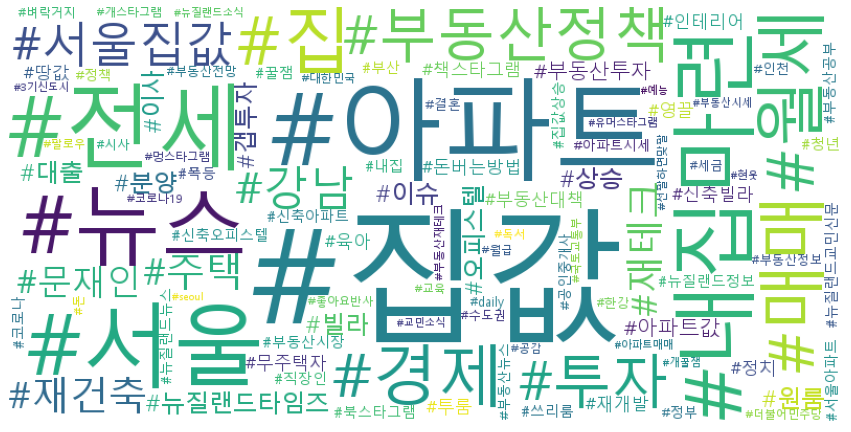

In [47]:
wordcloud = WordCloud(font_path = font_path,
                     background_color='white',
                     max_words=100,
                     relative_scaling=0.3,
                     width = 800,
                     height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/인스타_집값_워드클라우드')